In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
transactionData = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
customerData = pd.read_csv('QVI_purchase_behaviour.csv')

In [5]:
customerData

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


## Exploratory data analysis

In [6]:
transactionData.dtypes # helps to get data types of each column
transactionData.info() # used to check the data types and the null counts in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
customerData.dtypes 
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
# Convert DATE to datetime format
transactionData["DATE"]=pd.to_datetime(transactionData["DATE"], origin = "1899-12-30",unit="D")

In [9]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [11]:
Counter(" ".join(transactionData["PROD_NAME"]).split()).most_common()

[('175g', 60561),
 ('Chips', 49770),
 ('150g', 41633),
 ('Kettle', 41288),
 ('&', 35565),
 ('Smiths', 28860),
 ('Salt', 27976),
 ('Cheese', 27890),
 ('Pringles', 25102),
 ('134g', 25102),
 ('Doritos', 24962),
 ('Crinkle', 23960),
 ('110g', 22387),
 ('Corn', 22063),
 ('Original', 21560),
 ('Cut', 20754),
 ('Chip', 18645),
 ('170g', 18502),
 ('Salsa', 18094),
 ('Chicken', 15407),
 ('165g', 15297),
 ('Sea', 14145),
 ('Thins', 14075),
 ('Sour', 13882),
 ('Crisps', 12607),
 ('330g', 12540),
 ('Vinegar', 12402),
 ('Chilli', 12389),
 ('300g', 12041),
 ('RRD', 11894),
 ('Infuzions', 11057),
 ('Supreme', 10963),
 ('WW', 10320),
 ('Cobs', 9693),
 ('Popd', 9693),
 ('Tortilla', 9580),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('Sensations', 9429),
 ('Old', 9324),
 ('El', 9324),
 ('Paso', 9324),
 ('Dip', 9324),
 ('Sweet', 7883),
 ('Lime', 7852),
 ('Tomato', 7669),
 ('Cream', 7618),
 ('Thinly', 7507),
 ('Tyrrells', 6442),
 ('380g', 6418),
 ('And', 6373),
 ('BBQ', 6351),
 ('Tangy', 6332),
 ('Grain',

In [12]:
# remove special character and then sort the distinct words by frequency of occurrence.
transactionData["PROD_NAME"] = transactionData["PROD_NAME"].str.replace(r'([0-9]+[gG])','')
transactionData["PROD_NAME"] = transactionData["PROD_NAME"].str.replace(r'([&])','')

In [13]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamOnion,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8


In [20]:
# remove salsa products
#transactionData = transactionData[~transactionData["PROD_NAME"].str.contains(r"[Ss]alsa")]
salsa_df = transactionData[transactionData['PROD_NAME'].str.contains('salsa')].index

In [21]:
transactionData.drop(salsa_df, inplace=True) 

In [23]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamOnion,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8


In [41]:
word_count = Counter(" ".join(transactionData["PROD_NAME"]).split()).most_common() #list object

In [44]:
pd.DataFrame.from_records(word_count)

,0,1
0,Chips,49770
1,Kettle,41288
2,Salt,27976
3,Cheese,27890
4,Smiths,27390
5,Pringles,25102
6,Crinkle,22490
7,Corn,22063
8,Doritos,22041
9,Original,21560


In [25]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [24]:
transactionData.describe(include=[object])

,PROD_NAME
count,246742
unique,105
top,Kettle Mozzarella Basil Pesto
freq,3304


#### Find Outlier
There's an outlier in PROD_QTY since the max is 200

In [26]:
# filter the transaction with PROD_QTY ==200
transactionData[transactionData['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0


In [27]:
# Use a filter to see what other transactions that customer made.
transactionData[transactionData['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0


The customer only has two transactions!

In [30]:
# remove this customer from dataframe
transactionData.drop(transactionData[transactionData['PROD_QTY']==200].index, inplace=True)

In [31]:
# check data summary again
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [56]:
# Create a summary of transaction count by date.
tran_date = transactionData.groupby('DATE').count().reset_index()
tran_date

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-01,663,663,663,663,663,663,663
1,2018-07-02,650,650,650,650,650,650,650
2,2018-07-03,674,674,674,674,674,674,674
3,2018-07-04,669,669,669,669,669,669,669
4,2018-07-05,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...,...
359,2019-06-26,657,657,657,657,657,657,657
360,2019-06-27,669,669,669,669,669,669,669
361,2019-06-28,673,673,673,673,673,673,673
362,2019-06-29,703,703,703,703,703,703,703


only 364 rows, one day is missing. 

In [40]:
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(tran_date.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

The missing date is 2018-12-25

In [49]:
# join it onto the data to fill in the missing day.


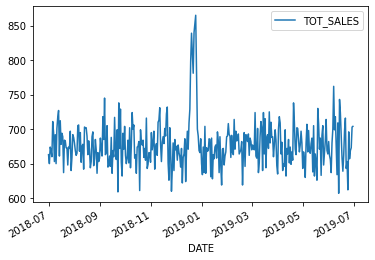

In [59]:
# Plot transactions over time
fig, ax = plt.subplots()
#ax.plot(testDJan.day, testDJan.Sheets, color='tab:orange')
tran_date.plot(x='DATE', y='TOT_SALES', ax=ax)
